In [3]:
# (1) 데이터 가져오기
# 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

import pandas as pd

train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
df = pd.DataFrame(train)
print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [4]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
# to_datetime 활용

# datetime 컬럼을 datetime 자료형으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

# 결과 확인
print(df)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

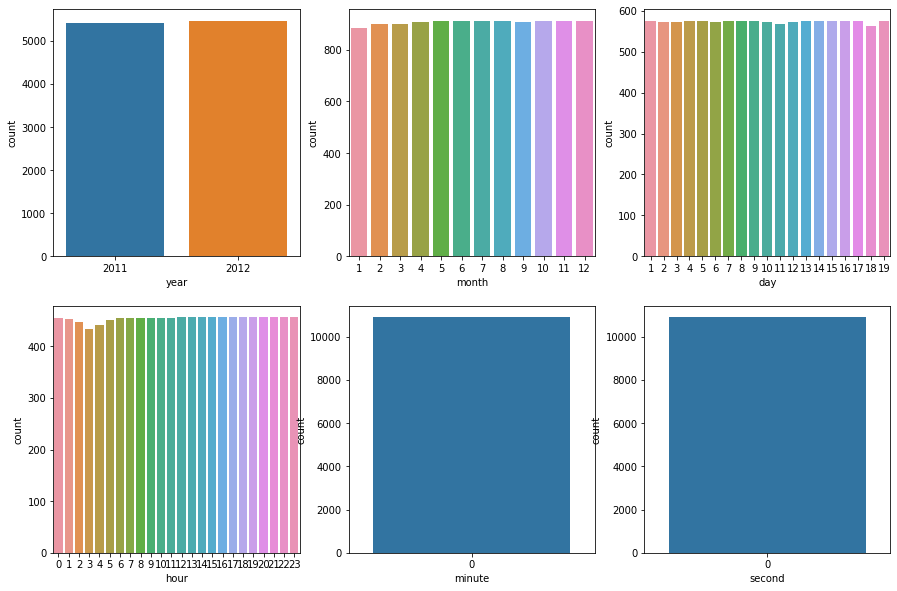

In [6]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
# sns.countplot 활용해서 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
# subplot 생성
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 각 컬럼에 대한 countplot 그래프 생성
sns.countplot(x='year', data=df, ax=axes[0, 0])
sns.countplot(x='month', data=df, ax=axes[0, 1])
sns.countplot(x='day', data=df, ax=axes[0, 2])
sns.countplot(x='hour', data=df, ax=axes[1, 0])
sns.countplot(x='minute', data=df, ax=axes[1, 1])
sns.countplot(x='second', data=df, ax=axes[1, 2])

# 결과 그래프 출력
plt.show()

In [15]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
# X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
from sklearn.model_selection import train_test_split

# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
X = df[['season','holiday','humidity','workingday','weather','temp','windspeed','year', 'month', 'day', 'hour', 'minute', 'second']]
y = df['count']

# Train/Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 13) (8708,)
(2178, 13) (2178,)


In [16]:
# (5) LinearRegression 모델 학습
# sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([239.50937953,  45.97499599, 207.43068266, ..., 305.49147838,
        39.42697714, 241.89089248])

In [17]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error
import numpy as np

# 학습된 모델에 X_test를 입력해서 예측값 출력하기
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과 출력
print("예측값:", y_pred)

# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse = mean_squared_error(y_test, y_pred)

# mse 값과 함께 rmse 값도 계산하기
rmse = np.sqrt(mse)

# 결과 출력
print("평균 제곱 오차(MSE):", mse)

# !!! RMSE 값 150 이하를 달성
print("루트 평균 제곱 오차(RMSE):", rmse)

예측값: [239.50937953  45.97499599 207.43068266 ... 305.49147838  39.42697714
 241.89089248]
평균 제곱 오차(MSE): 19962.939395049685
루트 평균 제곱 오차(RMSE): 141.2902664554416


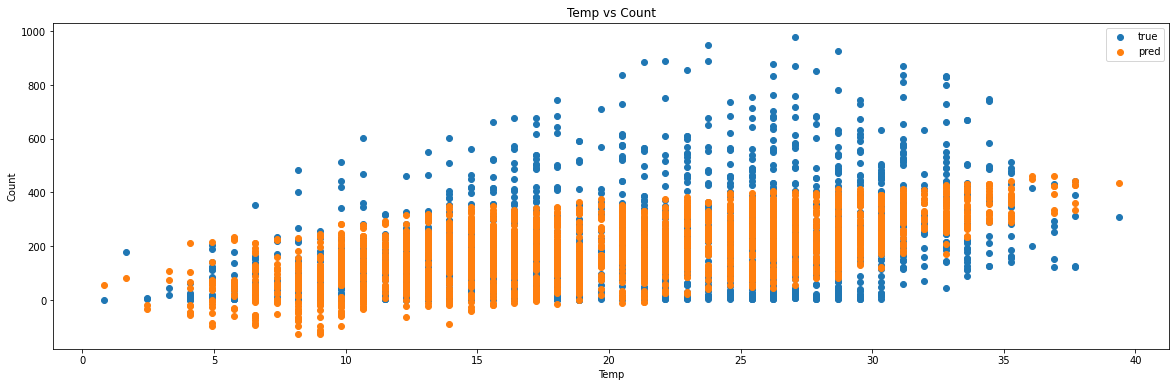

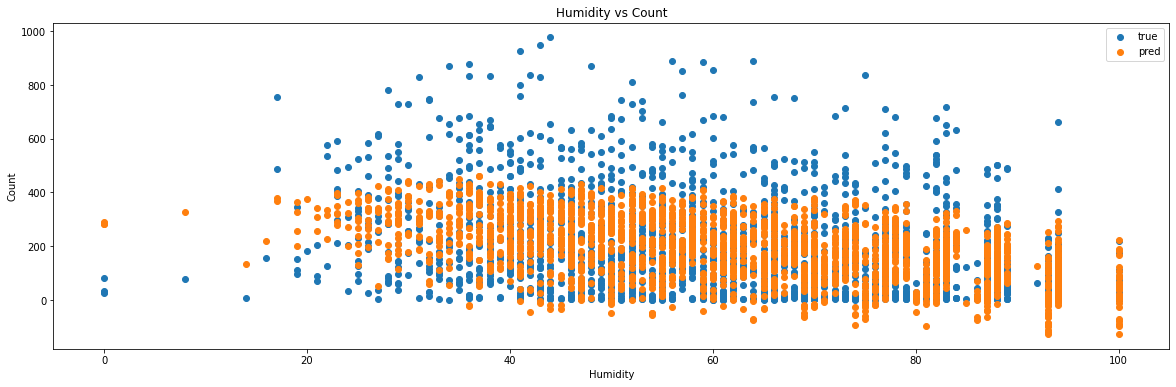

In [31]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.figure(figsize=(20, 6))
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.title('Temp vs Count')
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend()
plt.show()

# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.figure(figsize=(20, 6))
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
'''
1. 여러가지의 feature 중에서 필요없는 값을 잘 구분을 해야겠다고 생각하게 되었다.
2. to_datetime이 굉장히 어색했고 노력이 필요할 것 같다.
'''